              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

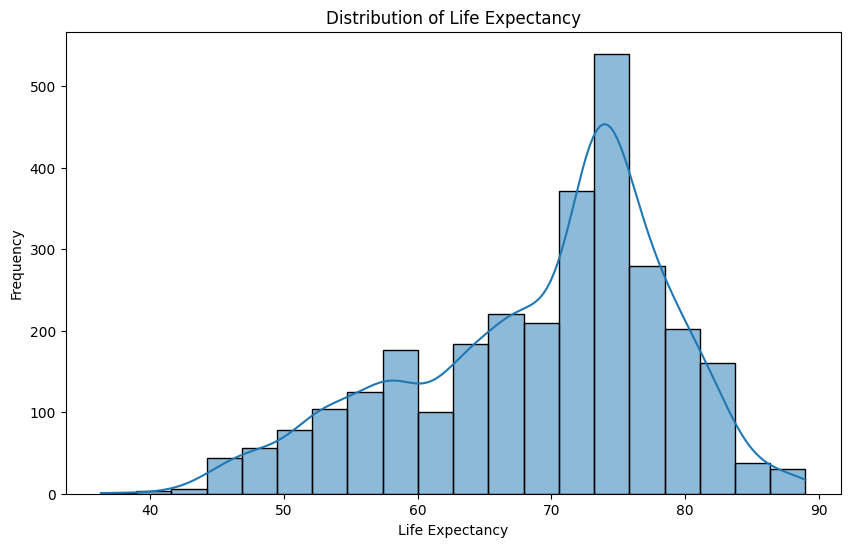

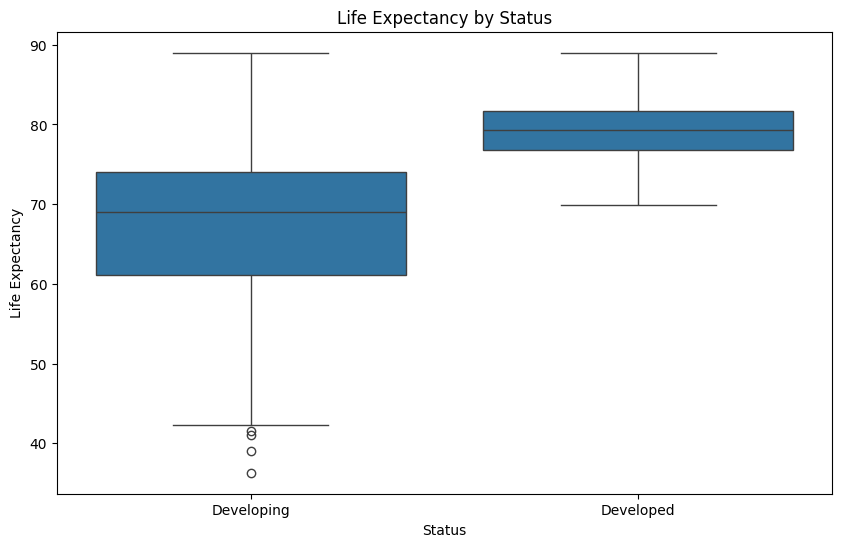

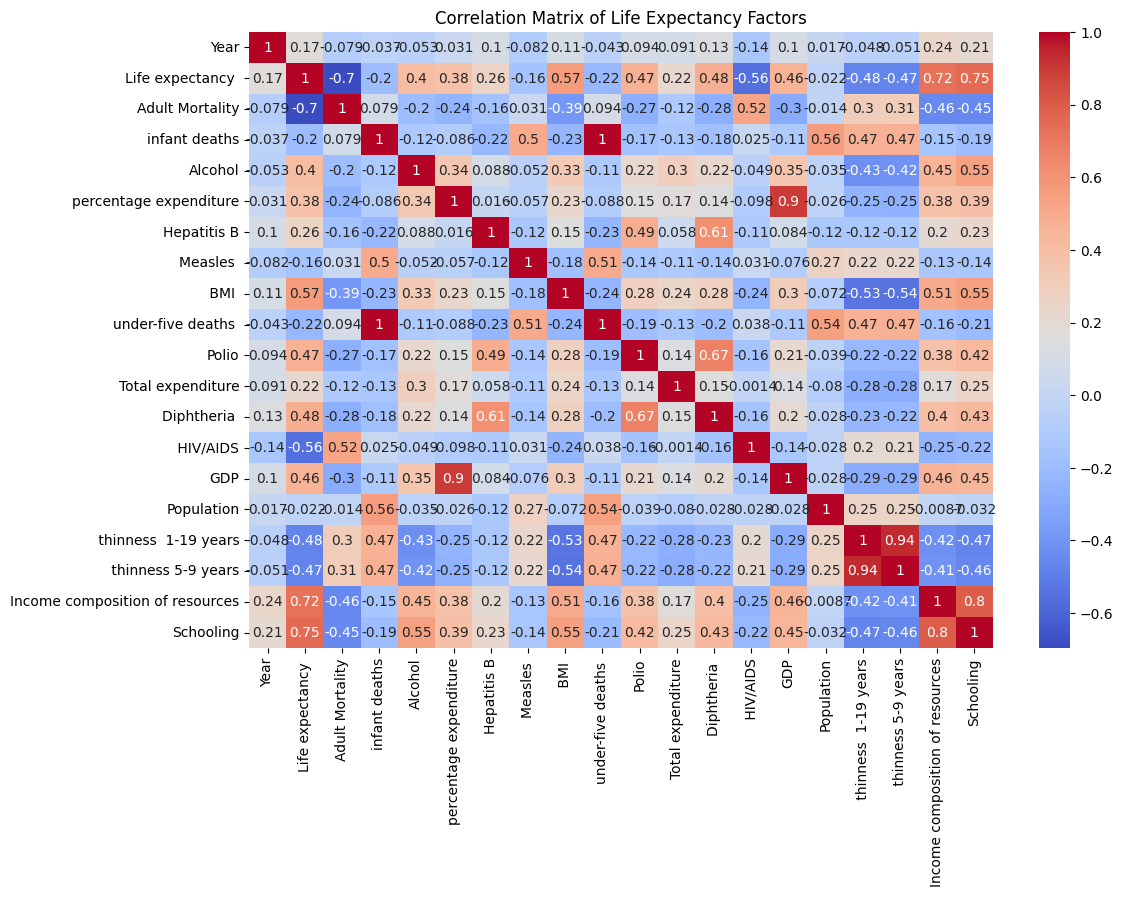

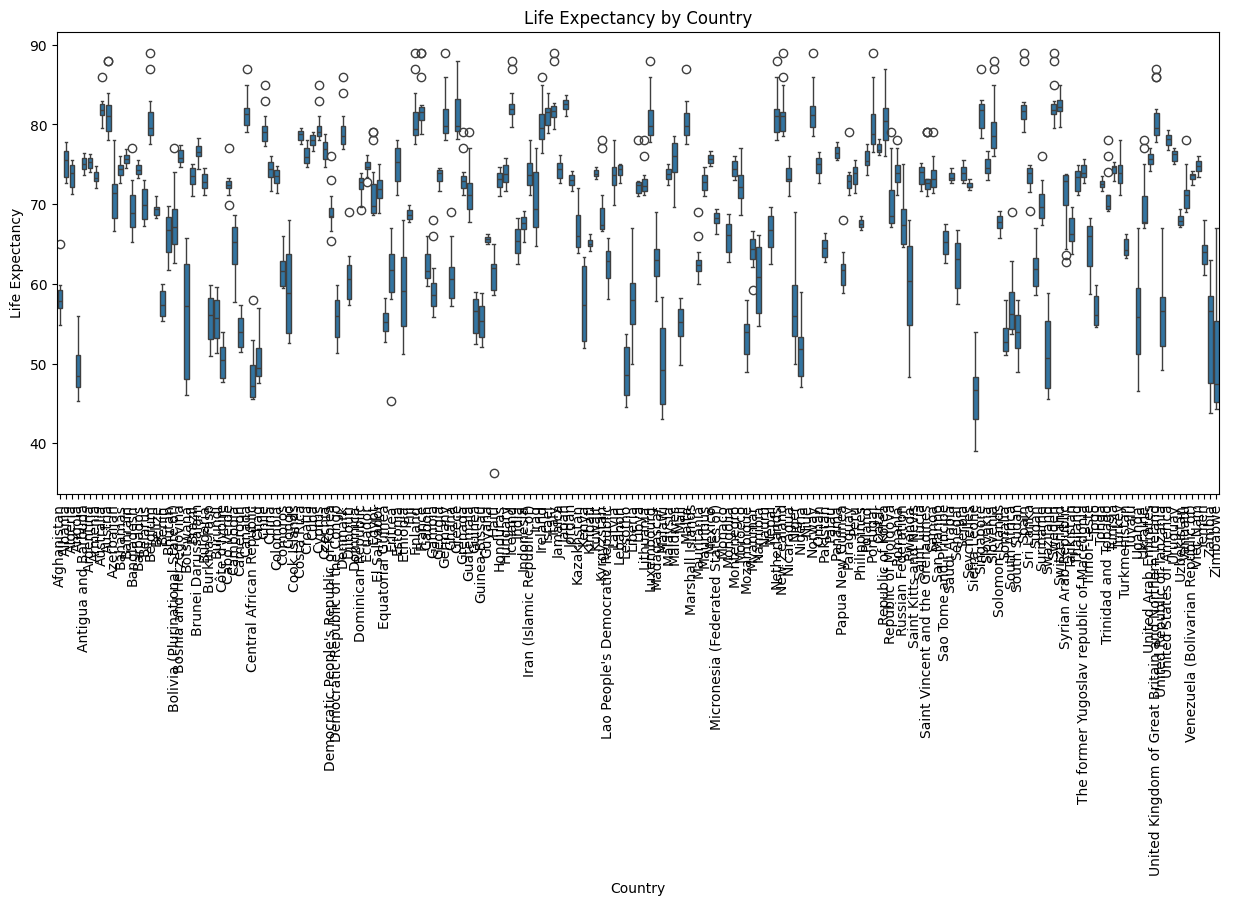

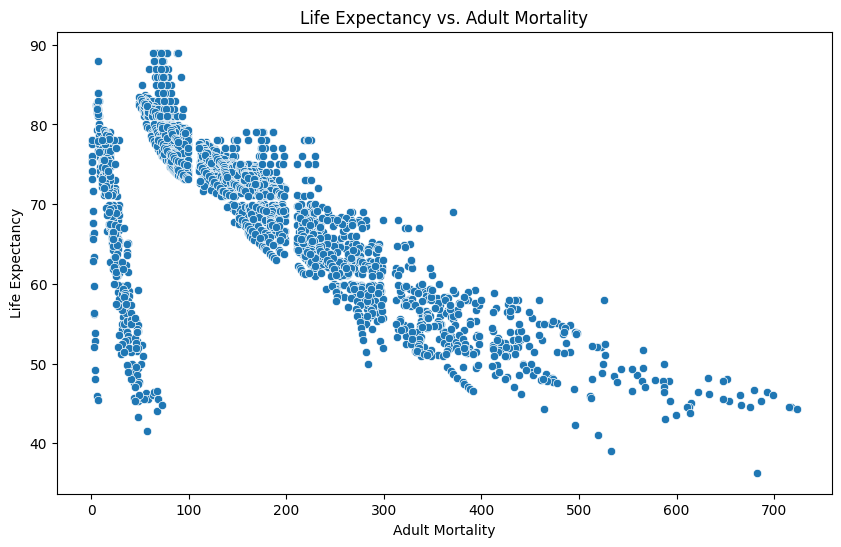

Status
Developed     79.197852
Developing    67.111465
Name: Life expectancy , dtype: float64


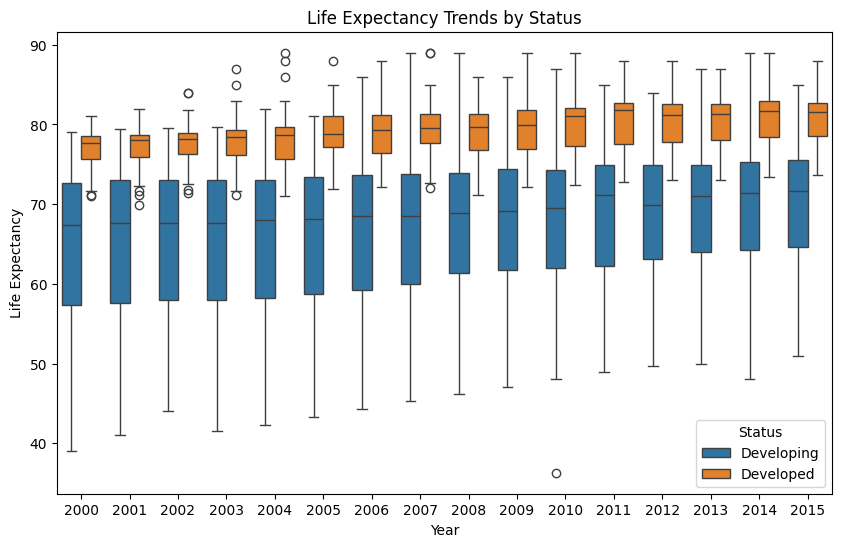

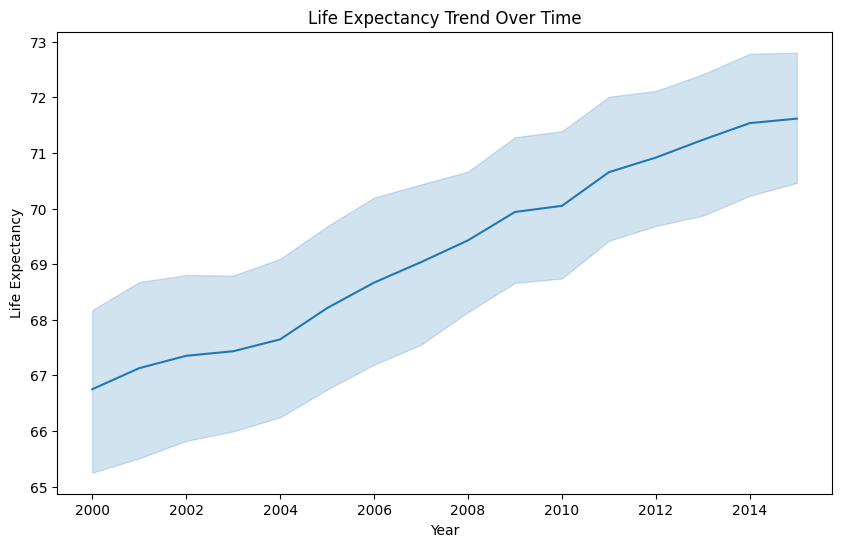

In [1]:
!pip install seaborn matplotlib pandas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Load the data
df = pd.read_csv('/content/Life Expectancy Data.csv')

# 1. Descriptive Statistics:
print(df.describe())

# 2. Data Distribution:
# a. Histograms:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], bins=20, kde=True)  # Note the space in the column name
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

# b. Box plots:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df)  # Note the space in the column name
plt.title('Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()


# 3. Correlation Analysis:
# a. Correlation matrix:
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Life Expectancy Factors')
plt.show()

# b. Visualization for categorical data (example: box plot):
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
sns.boxplot(x='Country', y='Life expectancy ', data=df)
plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



# c. Scatter plots:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs. Adult Mortality')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

# 4. Grouped Analysis:
# a. Grouped means:
grouped_means = df.groupby('Status')['Life expectancy '].mean()
print(grouped_means)

# b. Grouped box plots:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Life expectancy ', hue='Status', data=df)
plt.title('Life Expectancy Trends by Status')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()



# 5. Time Series Analysis:
# a. Line plots:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life expectancy ', data=df)
plt.title('Life Expectancy Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()



In [3]:
import numpy as np
print(df.isnull().sum())

# b. Impute missing values (example using median):
for column in df.select_dtypes(include=['number']).columns:
    df[column] = df[column].fillna(df[column].median())

Q1 = df['Life expectancy '].quantile(0.25)
Q3 = df['Life expectancy '].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df['Life expectancy '] = np.clip(df['Life expectancy '], lower_bound, upper_bound)



df['Status'] = df['Status'].replace({'Developped': 'Developed'})




df.drop_duplicates(inplace=True)



Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [5]:
!pip install factor_analyzer pandas seaborn matplotlib sklearn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('/content/Life Expectancy Data.csv')

# Data Cleaning (use the cleaning code from previous responses if needed)
# ...

# Feature Selection:

# 1. Prepare the data
X = df.drop(columns=['Life expectancy '])  # Features (excluding target)
y = df['Life expectancy ']  # Target variable
X = X.select_dtypes(include=['number'])
# Impute missing values in 'y' before fitting the RFE model:
y = y.fillna(y.median())  # Or any other suitable imputation strategy
X = X.fillna(X.median())
# 2. Recursive Feature Elimination (RFE)
model = LinearRegression()
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X, y)
selected_features_rfe = X.columns[selector.support_]
print("Selected features using RFE:", selected_features_rfe)

# 3. Feature Importance from Random Forest
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
selected_features_rf = feature_importances['Feature'][:5].tolist()
print("Selected features using Random Forest:", selected_features_rf)

# 4. Mutual Information
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores = mi_scores.sort_values(by='MI Score', ascending=False)
selected_features_mi = mi_scores['Feature'][:5].tolist()
print("Selected features using Mutual Information:", selected_features_mi)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Selected features using RFE: Index(['Total expenditure', ' HIV/AIDS', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Selected features using Random Forest: [' HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths '